In [51]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

import warnings
warnings.filterwarnings('ignore')


# **PREMIERE PARTIE : SEGMENTATION CLIENTELE<br>**
Dans cette première partie, nous allons segmenter les clients suivant le score RFM (Récence, Fréquence et Montant du client)

In [2]:
data = pd.read_csv('Online Retai.txt', sep=";")

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


# **Exploration initiale**

In [4]:
# Dimension du dataset
data.shape

(541909, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Il y'a utilité de changer le type de la variable **InvoiceDate**

In [23]:
from datetime import datetime

# Format de la chaîne de caractères
date_format = "%d/%m/%Y %H:%M"

# Convertir la chaîne en objet de type Date
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"], format=date_format)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
# Vérification s'il y a présence de valeurs manquantes
(data.isna().sum()/data.shape[0]).sort_values(ascending= False)

CustomerID     0.249267
Description    0.002683
InvoiceNo      0.000000
StockCode      0.000000
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
Country        0.000000
dtype: float64

Seules les variables CustomerID et Description comportent des valeurs manquantes

In [9]:
# Nombre de données dupliquées
data.duplicated().sum()

5268

In [10]:
# Suppression des donnnées dupliquées
data.drop_duplicates(inplace = True)

In [11]:
# Nombre de données dupliquées
data.duplicated().sum()

0

In [12]:
# Nombre de clients dans chaque pays
data.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
36,United Kingdom,356728
14,Germany,9480
13,France,8475
10,EIRE,7475
31,Spain,2528
24,Netherlands,2371
3,Belgium,2069
33,Switzerland,1877
27,Portugal,1471
0,Australia,1258


On peut remarquer que **United Kingdom** enregistre plus de **66%** des clients.<br>
Dans l'étape qui va suivre, nous allons nous intéresser au pays **United Kingdom** pour faire la segmentation clientèle

In [14]:
# Sélection du pays United Kingdom
df = data.loc[data['Country'] == 'United Kingdom']
# Affichage de la modalité de la variable Country
df.Country.value_counts()

United Kingdom    490300
Name: Country, dtype: int64

In [15]:
# Vérification s'il y a présence de valeurs manquantes de notre nouveau dataset
(df.isna().sum()/df.shape[0]).sort_values(ascending= False)

CustomerID     0.272429
Description    0.002966
InvoiceNo      0.000000
StockCode      0.000000
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
Country        0.000000
dtype: float64

In [16]:
# Suppressions des valeurs manquantes
df = df[pd.notnull(df['CustomerID'])]
# Vérification s'il y a présence de valeurs manquantes de notre dataset
(df.isna().sum()/df.shape[0]).sort_values(ascending= False)

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [19]:
# Dimensions 
df.shape

(356728, 8)

# **Analyse exploratoire**

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356728 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    356728 non-null  object        
 1   StockCode    356728 non-null  object        
 2   Description  356728 non-null  object        
 3   Quantity     356728 non-null  int64         
 4   InvoiceDate  356728 non-null  datetime64[ns]
 5   UnitPrice    356728 non-null  float64       
 6   CustomerID   356728 non-null  float64       
 7   Country      356728 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.5+ MB


In [42]:
# Selection des variables numériques
numCols = df.select_dtypes(include =np.number).columns.tolist()
numCols

['Quantity', 'UnitPrice', 'CustomerID']

### **Analyse univariée**

In [43]:
# Audit des variables numériques
df[numCols].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,356728.0,11.198644,264.998044,-80995.0,2.00,4.00,12.00,80995.0
UnitPrice,356728.0,3.268255,71.162330,0.0,1.25,1.95,3.75,38970.0
CustomerID,356728.0,15543.795284,1594.286219,12346.0,14191.00,15513.00,16931.00,18287.0


On peut remarquer que le minimum de la variable quantité est **négatif**. Celà dit qu'il y'a intéret à ne retenir que les valeurs positives<br>
Le prix unitaire moyen est de **3.27** et nombre de clients moyen est de **15534**.

In [45]:
# Sélection des valeurs positives de la variable Quantity
df = df.loc[df['Quantity'] >0]

# Audit des variables numériques
df[numCols].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,349227.0,12.181295,191.797470,1.0,2.00,4.00,12.00,80995.00
UnitPrice,349227.0,2.972124,17.990307,0.0,1.25,1.95,3.75,8142.75
CustomerID,349227.0,15548.333625,1594.403077,12346.0,14191.00,15518.00,16931.00,18287.00


On peut remarquer que le minimum de la variable **Quantity** est **positif**.<br>
Ainsi, la quantité de produits moyenne est de **12**, le prix unitaire est de **2.97$** et le nombre moyen des clients est de **15548**.

Des graphes difficiles à interpréter néanmoins procédons-nous à voir leurs histogrammes.<br>
Toutefois, les distributions de ces variables sont asymétriques. 

array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'UnitPrice'}>],
       [<Axes: title={'center': 'CustomerID'}>, <Axes: >]], dtype=object)

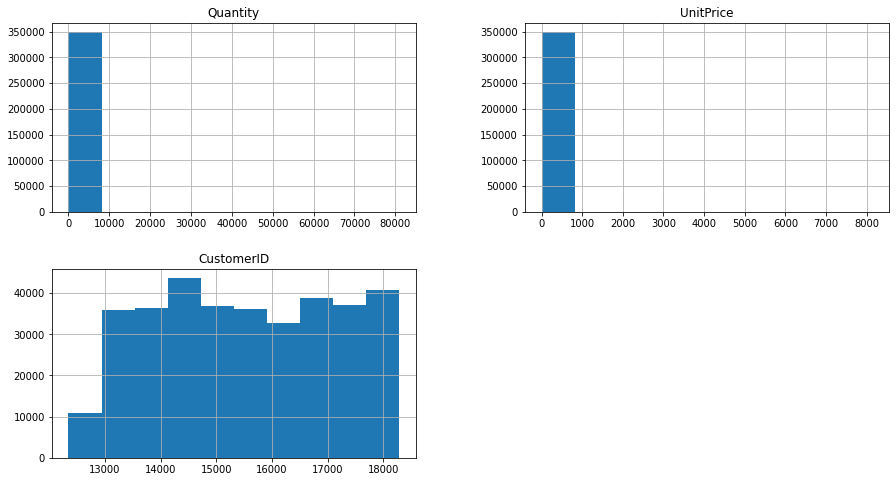

In [50]:
# Fonction pour tracer des histogrammes
def histogram(df):
    return df.hist(figsize=(15,8))
# Distributions des variables numériques
histogram(df[numCols])

On peut remarquer parexemple que tous les graphes ont distributions asymétriques. 

In [54]:
# Audit des variables catégorielles
df.select_dtypes('object').describe().T

,count,unique,top,freq
InvoiceNo,349227,16649,576339,542
StockCode,349227,3645,85123A,1936
Description,349227,3844,WHITE HANGING HEART T-LIGHT HOLDER,1929
Country,349227,1,United Kingdom,349227


On peut remarquer que le produit le plus acheté est **WHITE HANGING HEART T-LIGHT HOLDER**. 

In [57]:
# Audit de la variable InvoiceDate
df.InvoiceDate.describe()

count                  349227
unique                  15615
top       2011-11-14 15:27:00
freq                      542
first     2010-12-01 08:26:00
last      2011-12-09 12:49:00
Name: InvoiceDate, dtype: object

On peut remarquer que la première date est **2010-12-01 08:26:00** et la dernière date est **2011-12-09 12:49:00**.<br>
La date du **2011-11-14 15:27:00** montre qu'il y'a eu beaucoup d'achats.

### **Analyse bivariée**

In [72]:
# Quantité de produits suivant la date
df.groupby(['InvoiceDate'])['Quantity'].aggregate('count').reset_index().sort_values('Quantity', ascending=False)

,InvoiceDate,Quantity
13733,2011-11-14 15:27:00,542
14777,2011-11-28 15:54:00,533
15315,2011-12-05 17:17:00,529
14451,2011-11-23 13:39:00,443
12773,2011-10-31 14:09:00,435
...,...,...
4147,2011-04-04 13:47:00,1
8712,2011-08-02 11:34:00,1
6445,2011-06-03 15:43:00,1
12391,2011-10-25 12:22:00,1


Les dates du **2011-11-14 15:27:00, 2011-11-28 15:54:00 et 2011-12-05 17:17:00** enregistrent un nombre important de quantités de produits achetés.

In [68]:
# Prix unitaire suivant la date
df.groupby(['InvoiceDate'])['UnitPrice'].aggregate('sum').reset_index().sort_values('UnitPrice', ascending=False)

,InvoiceDate,UnitPrice
5095,2011-05-03 13:46:00,8142.75
15315,2011-12-05 17:17:00,3981.54
14777,2011-11-28 15:54:00,3929.51
13733,2011-11-14 15:27:00,3802.30
14451,2011-11-23 13:39:00,3191.35
...,...,...
8201,2011-07-19 17:04:00,0.06
2498,2011-02-16 12:10:00,0.06
10926,2011-09-27 09:46:00,0.00
2324,2011-02-10 13:08:00,0.00


La date du **2011-05-03 13:46:00** enregistre le prix unitaire le plus élevé.

In [74]:
# Prix unitaire suivant le nom de produits
df.groupby(['Description'])['UnitPrice'].aggregate('sum').reset_index().sort_values('UnitPrice', ascending=False)

,Description,UnitPrice
2740,REGENCY CAKESTAND 3 TIER,17737.00
2111,Manual,16486.17
1025,DOTCOM POSTAGE,11906.36
2585,POSTAGE,8619.02
2324,PARTY BUNTING,6345.02
...,...,...
633,CAT WITH SUNGLASSES BLANK CARD,0.19
2447,PINK FLUFFY CHRISTMAS DECORATION,0.19
1575,HAPPY BIRTHDAY CARD TEDDY/CAKE,0.19
1508,GREETING CARD. TWO SISTERS.,0.19


Le produit le plus cher est **REGENCY CAKESTAND 3 TIER**.

In [75]:
# Quantité de produits suivant le nom de produits
df.groupby(['Description'])['Quantity'].aggregate('sum').reset_index().sort_values('Quantity', ascending=False)

,Description,Quantity
2298,PAPER CRAFT . LITTLE BIRDIE,80995
1975,MEDIUM CERAMIC TOP STORAGE JAR,76919
3753,WORLD WAR 2 GLIDERS ASSTD DESIGNS,49086
1747,JUMBO BAG RED RETROSPOT,41878
3666,WHITE HANGING HEART T-LIGHT HOLDER,34630
...,...,...
1045,DUSTY PINK CHRISTMAS TREE 30CM,1
1490,GREEN PENDANT TRIPLE SHELL NECKLACE,1
2497,PINK POLKADOT KIDS BAG,1
3087,SET/3 TALL GLASS CANDLE HOLDER PINK,1


Les produits **PAPER CRAFT.LITTLE BIRDIE et	MEDIUM CERAMIC TOP STORAGE JAR** sont les plus importants en termes de quantité.

# **Feature engineering**

### **Calcul de la Récence, la Fréquence et le Montant(RFM)**

Dans cette partie, nous allons calculer **la récence, la fréquence et le montant (RFM)** dans le but d'appliquer la segmentation. 

In [77]:
# Calcul du montant (Prix unitaire * Quantité)
df['Montant'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Montant
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [78]:
# Les dates minimales et maximales
df.InvoiceDate.min(), df.InvoiceDate.max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

In [80]:
# La dernière date
import datetime as dtime
last_date= dtime.datetime(2011,12,10)

In [81]:
# Calcul de la récence et de la fréquence
RecenceFreqMont = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (last_date - x.max()).days, # Récence
                                        'InvoiceNo': lambda x: len(x),      # Fréquence
                                        'Montant': lambda x: x.sum()}) # Montant
RecenceFreqMont.head()


,InvoiceDate,InvoiceNo,Montant
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4413,33053.19
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [85]:
# Renommage des colonnes
RecenceFreqMont.columns = ['Recence', 'Frequence', 'Montant']

# Apercu de la base 
RecenceFreqMont.head()

,Recence,Frequence,Montant
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4413,33053.19
12749.0,3,199,4090.88
12820.0,3,59,942.34


On peut dire que le clent **12346** a une récence de **325**, un nombre de fréquences égal à **1** et un montant égal à **77183.6$**.<br>
Le clent **12747** a une récence de **2**, un nombre de fréquences égal à **103** et un montant égal à **4196.01$**.<br>

In [86]:
# Affichage du client CustomerID = 12346.0
df[df['CustomerID']== 12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Montant
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6


Ce client n'a été présent qu'une seule fois.Il a acheté **74215** comme quantité de produits. Cependant, le prix unitaire **1.04** est très faible.

### **Calcul des Segments (RFM)**

Dans cette partie, nous allons utiliser les **quartiles** pour calculer les segments.<br> 
La méthode des quintiles voir **Méthode%20de%20Segmentation%20RFM%20–%20Définition%20&%20Scoring.html**

In [88]:
quantiles = RecenceFreqMont.quantile(q=[0.25,0.5,0.75])
quantiles

,Recence,Frequence,Montant
0.25,17.0,17.0,298.11
0.50,50.0,40.0,644.30
0.75,142.0,98.0,1570.81


In [89]:
# Conversion de quantiles en dictionnaire
quantiles = quantiles.to_dict()
quantiles

{'Recence': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequence': {0.25: 17.0, 0.5: 40.0, 0.75: 98.0},
 'Montant': {0.25: 298.11, 0.5: 644.3, 0.75: 1570.81}}

Il est clair que le meilleur client est celui qui a une récence **faible**, une fréquence et un montant **élevés**.<br> 
Ainsi, nous allons choisir que **4 segments**.

In [90]:
# Fonction d'attribution de score de segments pour la récence
def RecenceScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    

# Fonction d'attribution de score de segments pour la fréquence et le montant
def FreqMontScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [91]:
RecenceFreqMont.head()

,Recence,Frequence,Montant
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4413,33053.19
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [92]:
# Attribution de score à la récence 
RecenceFreqMont['recence_quartile'] = RecenceFreqMont['Recence'].apply(RecenceScore, args=('Recence',quantiles,))

# Attribution de score à la fréquence
RecenceFreqMont['freq_quartile'] = RecenceFreqMont['Frequence'].apply(FreqMontScore, args=('Frequence',quantiles,))

# Attribution de score au montant
RecenceFreqMont['mont_quartile'] = RecenceFreqMont['Montant'].apply(FreqMontScore, args=('Montant',quantiles,))

# Apercu des nouvelles colonnes
RecenceFreqMont.head()

,Recence,Frequence,Montant,recence_quartile,freq_quartile,mont_quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4413,33053.19,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


In [93]:
# Concaténation des scores en un score RFM
RecenceFreqMont['ScoreRFM'] = RecenceFreqMont.recence_quartile.map(str) \
                            + RecenceFreqMont.freq_quartile.map(str) \
                            + RecenceFreqMont.mont_quartile.map(str)
RecenceFreqMont.head()

,Recence,Frequence,Montant,recence_quartile,freq_quartile,mont_quartile,ScoreRFM
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,441
12747.0,2,103,4196.01,1,1,1,111
12748.0,0,4413,33053.19,1,1,1,111
12749.0,3,199,4090.88,1,1,1,111
12820.0,3,59,942.34,1,2,2,122


On peut remarquer que notre premier client n'est pas vraiment meilleur.

In [97]:
# Top 15 de nos meilleurs clients 
RecenceFreqMont[RecenceFreqMont.ScoreRFM =='111'].sort_values('Montant', ascending=False).head(15)

,Recence,Frequence,Montant,recence_quartile,freq_quartile,mont_quartile,ScoreRFM
CustomerID,,,,,,,
18102.0,0,431,259657.30,1,1,1,111
17450.0,8,336,194390.79,1,1,1,111
17511.0,2,963,91062.38,1,1,1,111
16684.0,4,277,66653.56,1,1,1,111
14096.0,4,5111,65164.79,1,1,1,111
13694.0,3,568,65039.62,1,1,1,111
15311.0,0,2366,60632.75,1,1,1,111
13089.0,2,1814,58762.08,1,1,1,111
15769.0,7,130,56252.72,1,1,1,111


**CustomerID 18102** est le meilleur client parmis eux récence **nulle** mais aussi fréquence et montant très **élevés**. 

# **DEUXIEME PARTIE : CLUSTERING**<br>
Dans cette deuxième partie, nous allons segmenter les clients suivant l'algorithme des KMeans en se basant à la récence, la fréquence et le montant. 

In [98]:
RecenceFreqMont.head()

,Recence,Frequence,Montant,recence_quartile,freq_quartile,mont_quartile,ScoreRFM
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,441
12747.0,2,103,4196.01,1,1,1,111
12748.0,0,4413,33053.19,1,1,1,111
12749.0,3,199,4090.88,1,1,1,111
12820.0,3,59,942.34,1,2,2,122


In [99]:
RecenceFreqMont.columns

Index(['Recence', 'Frequence', 'Montant', 'recence_quartile', 'freq_quartile',
       'mont_quartile', 'ScoreRFM'],
      dtype='object')

In [100]:
dfRFreqMont = RecenceFreqMont[['Recence', 'Frequence', 'Montant','ScoreRFM']]
dfRFreqMont.head()

,Recence,Frequence,Montant,ScoreRFM
CustomerID,,,,
12346.0,325,1,77183.60,441
12747.0,2,103,4196.01,111
12748.0,0,4413,33053.19,111
12749.0,3,199,4090.88,111
12820.0,3,59,942.34,122


In [101]:
dfRFreqMont.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3921 entries, 12346.0 to 18287.0
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recence    3921 non-null   int64  
 1   Frequence  3921 non-null   int64  
 2   Montant    3921 non-null   float64
 3   ScoreRFM   3921 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 153.2+ KB


In [103]:
# Sélection des variables numériques de la base
Colnums = dfRFreqMont.drop('ScoreRFM', axis = 1).columns.tolist()
Colnums

['Recence', 'Frequence', 'Montant']

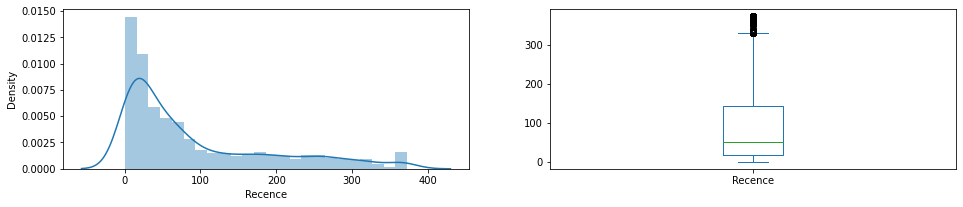

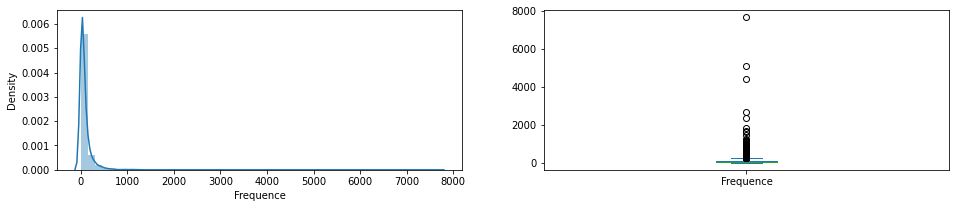

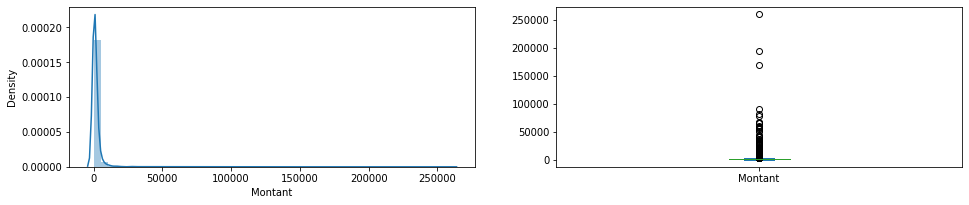

In [105]:
#Distribution des variables quantitatives
for col in Colnums:
    plt.subplot(321)
    sns.distplot(dfRFreqMont[col])

    plt.subplot(322)
    dfRFreqMont[col].plot.box(figsize=(16,10))
    plt.suptitle('')
    plt.show()

On a des distributions asymétriques et la présence de beaucoup de valeurs abérrantes. Alors, on peut utiliser **RobustScaler** pour la normalisation.

### **Normalisation**

In [106]:
# Standardisation
from sklearn.preprocessing import RobustScaler

# Application de la normalisation
scaler = RobustScaler()
df_scaled = scaler.fit_transform(dfRFreqMont[Colnums])
df_scaled

array([[ 2.2       , -0.48148148, 60.13931013],
       [-0.384     ,  0.77777778,  2.79068909],
       [-0.4       , 53.98765432, 25.46467353],
       ...,
       [-0.344     , -0.34567901, -0.36634714],
       [-0.376     ,  8.40740741,  1.10099002],
       [-0.064     ,  0.37037037,  0.93736151]])

### **Application du Kmeans**

In [107]:
from sklearn.cluster import KMeans

In [108]:
# Liste pour stocker les distances pour les differentes valeurs de k
from sklearn.metrics import silhouette_score
wcss = []
score_silhouette = []
for i in range(2,11):
    kmeans = KMeans(n_clusters = i, init ='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    score_silhouette.append(silhouette_score(df_scaled, kmeans.labels_))

In [109]:
# Somme des distances pour chaque valeur de k variant de 2 à 10, et on remarque que les distances diminuent car les clusters deviennent plus petits
wcss

[82214.89427283028,
 44774.85248003866,
 33525.95573493125,
 22872.259993241198,
 18522.111155286977,
 15740.744846038277,
 13205.359915010014,
 11401.54478400669,
 9719.448218641704]

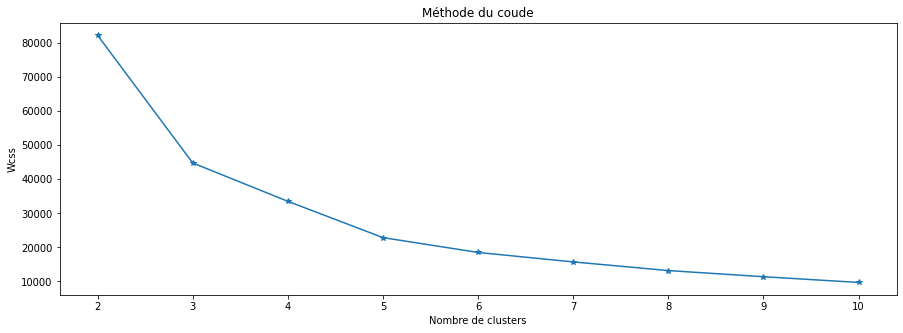

In [110]:
# Utilisation de la méthode du "coudé" ou "Elbow method" pour trouver le k optimal
plt.figure(figsize=(15,5))
plt.plot(range(2, 11), wcss, marker ='*')
plt.xlabel('Nombre de clusters')
plt.ylabel('Wcss')
plt.title('Méthode du coude')
plt.show()

On peut remarquer qu'il y'a eu cassure pour k = 3

In [111]:
# Choisissons k=4 pour plus de détailler davantage nos données suivant les clusters.
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_scaled)

KMeans(n_clusters=4, random_state=42)

In [112]:
# Ajouter les labels de cluster du dataset initial
dfRFreqMont['Segment'] = kmeans.predict(df_scaled)   # Oubien dfRFreqMont['Segment'] = kmeans.labels_
dfRFreqMont.head()

,Recence,Frequence,Montant,ScoreRFM,Segment
CustomerID,,,,,
12346.0,325,1,77183.60,441,1
12747.0,2,103,4196.01,111,0
12748.0,0,4413,33053.19,111,3
12749.0,3,199,4090.88,111,0
12820.0,3,59,942.34,122,0


In [113]:
# Inspection des segment suivant les variables
df_segment = dfRFreqMont.groupby(['Segment'])[dfRFreqMont[Colnums].columns].mean().round(0)
df_segment

,Recence,Frequence,Montant
Segment,,,
0,92.0,82.0,1352.0
1,34.0,482.0,46890.0
2,3.0,257.0,207507.0
3,2.0,5733.0,46246.0


**Segment 0** : Ces clients ayant une récence moyenne de 90 jours(3 mois). Ils ont des fréquences et montant  très faibles.<br>
Ce segment ne contribue pas vraiment en termes de chiffres d'affaires, néanmoins, on peut mettre en place des stratégies les poussant à dépenser plus<br>  
**Segment 1** : Ces clients ayant une récence moyenne de 34 jours(1 mois 4 jours).Ils ont des fréquences moyennes un peu et montant mieux que le **Segment 0**<br>
Celà dit qu'il y' a intéret de les conserver(), et les pousser à acheter plus.<br>

**Segment 2** : Ces clients ayant une récence 3 jours. Ils sont meilleurs en termes chiffres d'affaires meme si la fréquence n'est pas assez importante.<br>
Ces clients contribuent très significativement dans les chiffres d'affaires du supermarché. Il y a intéret de mettre en place des stratégies de rétention pour les conserver jusqu'à ce qu'ils soient très fréquents.<br>

**Segment 3** : Ces clients ayant une récence de 2 jours. Ils une fréquence très élevée mais ils contribuent en chiffres d'affaires moyens **46246$**.<br>
Ces clients doivent etre poussés à acheter plus.

<Figure size 1080x720 with 0 Axes>

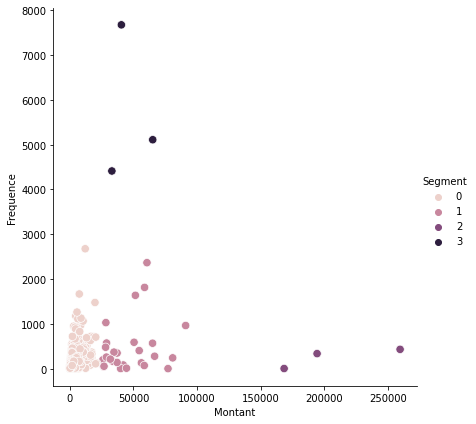

In [116]:
# Graphe Montant vs Frequence suivant le Segment
plt.figure(figsize=(15,10))
sns.relplot(x = "Montant", y = "Frequence", hue = "Segment", data = dfRFreqMont, height = 6, s = 70)

<Figure size 1080x720 with 0 Axes>

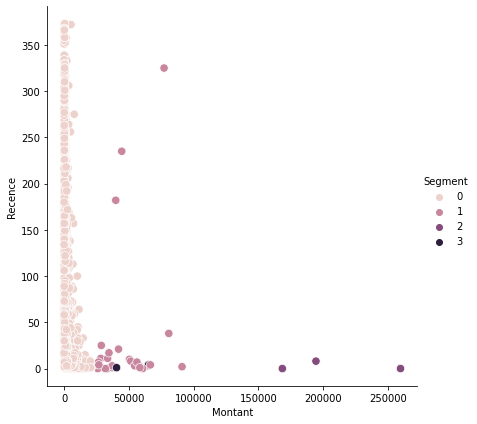

In [119]:
# Graphe Montant vs Frequence suivant le Segment
plt.figure(figsize=(15,10))
sns.relplot(x = "Montant", y = "Recence", hue = "Segment", data = dfRFreqMont, height = 6, s = 70)

<Figure size 1080x720 with 0 Axes>

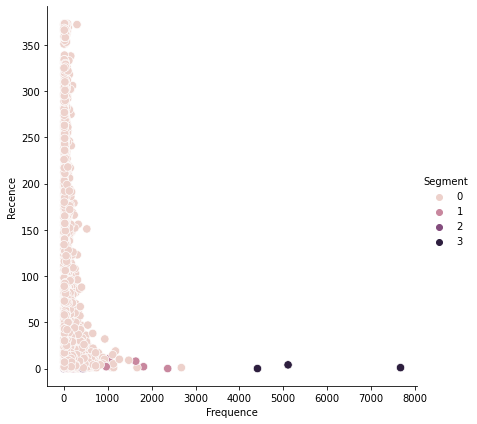

In [120]:
# Graphe Frequence vs Montant suivant le Segment
plt.figure(figsize=(15,10))
sns.relplot(x = "Frequence", y = "Recence", hue = "Segment", data = dfRFreqMont, height = 6, s = 70)

<Figure size 1080x720 with 0 Axes>

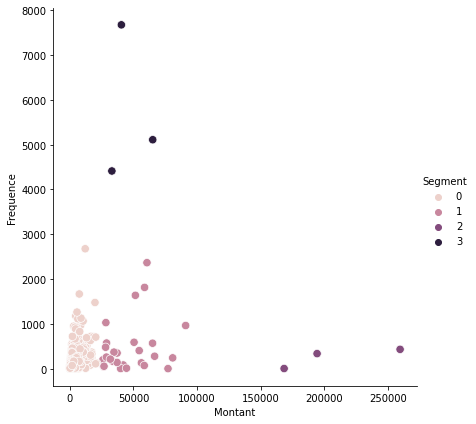

In [135]:
# Graphe Montant vs Frequence suivant le Segment
plt.figure(figsize=(15,10))
sns.relplot(x = "Montant", y = "Frequence", hue = "Segment", data = dfRFreqMont, height = 6, s = 70)

In [127]:
dfRFreqMont.columns

Index(['Recence', 'Frequence', 'Montant', 'ScoreRFM', 'Segment'], dtype='object')

In [149]:
dfRFreqMont.groupby(['Segment'])['ScoreRFM'].aggregate('count').reset_index().sort_values('ScoreRFM', ascending=False)

,Segment,ScoreRFM
0,0,3888
1,1,27
2,2,3
3,3,3


In [142]:
# Sélection des meilleurs clients 
df_bestcustomers = dfRFreqMont[dfRFreqMont.ScoreRFM =='111'].sort_values('Segment')
df_bestcustomers.head()

,Recence,Frequence,Montant,ScoreRFM,Segment
CustomerID,,,,,
12747.0,2,103,4196.01,111,0
16525.0,2,183,13027.45,111,0
16523.0,1,290,9418.47,111,0
16474.0,7,337,1810.65,111,0
16458.0,2,202,3482.74,111,0


In [148]:
# Le ScoreRFM suivant le Segment
df_bestcustomers.groupby(['Segment'])['ScoreRFM'].aggregate('count').reset_index().sort_values('ScoreRFM', ascending=False)

,Segment,ScoreRFM
0,0,384
1,1,18
3,3,3
2,2,2
